60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 65us/sample - loss: 0.7516 - accuracy: 0.7880 - val_loss: 0.2836 - val_accuracy: 0.9203
Epoch 2/20
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3157 - accuracy: 0.9079 - val_loss: 0.2115 - val_accuracy: 0.9387
Epoch 3/20
48000/48000 [==============================] - 3s 58us/sample - loss: 0.2408 - accuracy: 0.9292 - val_loss: 0.1741 - val_accuracy: 0.9497
Epoch 4/20
48000/48000 [==============================] - 3s 59us/sample - loss: 0.2004 - accuracy: 0.9417 - val_loss: 0.1489 - val_accuracy: 0.9585
Epoch 5/20
48000/48000 [==============================] - 3s 63us/sample - loss: 0.1704 - accuracy: 0.9496 - val_loss: 0.1344 - val_accuracy: 0.9613
Epoch 6/20
48000/48000 [==============================] - 3s 58us/sample - loss: 0.1501 - accuracy: 0.9557 - val_loss: 0.1207 - val_accuracy: 0.9657
Epoch 7/20
48000/

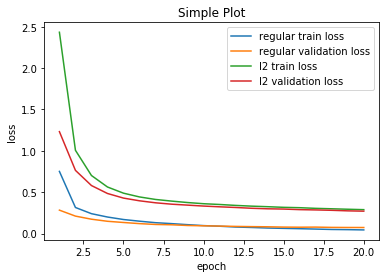

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2


from matplotlib import pyplot as plt


EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10

N_HIDDEN = 512
VALIDATION_SPLIT = 0.2

DROPOUT = 0.3
REGULARIZATION_LOSS_WEIGHT = 0.005

mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)


regularizer_histories = {}

#0.001 is the default learning rate
opt = keras.optimizers.Adam(learning_rate=0.0001)

modelRegular = tf.keras.models.Sequential()
modelRegular.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='input_dense_layer',activation='relu'))
modelRegular.add(keras.layers.Dropout(DROPOUT))
modelRegular.add(keras.layers.Dense(N_HIDDEN, name='hidden_dense_layer',activation='relu'))
modelRegular.add(keras.layers.Dropout(DROPOUT))
modelRegular.add(keras.layers.Dense(NB_CLASSES, name='output_dense_layer',activation='softmax'))


modelRegular.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

regularizer_histories['regular'] = modelRegular.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


modell2 = tf.keras.models.Sequential()
modell2.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='input_dense_layer',activation='relu', kernel_regularizer=l2(REGULARIZATION_LOSS_WEIGHT)))
modell2.add(keras.layers.Dropout(DROPOUT))
modell2.add(keras.layers.Dense(N_HIDDEN, name='hidden_dense_layer',activation='relu', kernel_regularizer=l2(REGULARIZATION_LOSS_WEIGHT)))
modell2.add(keras.layers.Dropout(DROPOUT))
modell2.add(keras.layers.Dense(NB_CLASSES, name='output_dense_layer',activation='softmax'))


modell2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

regularizer_histories['l2'] = modell2.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

regular_train_loss = regularizer_histories['regular'].history['loss']
regular_validation_loss = regularizer_histories['regular'].history['val_loss']

l2_train_loss = regularizer_histories['l2'].history['loss']
l2_validation_loss = regularizer_histories['l2'].history['val_loss']
epochs = range(1, len(l2_validation_loss)+1)


fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(epochs, regular_train_loss, label='regular train loss')
ax.plot(epochs, regular_validation_loss, label='regular validation loss')
ax.plot(epochs, l2_train_loss, label='l2 train loss')
ax.plot(epochs, l2_validation_loss, label='l2 validation loss')
ax.set_xlabel('epoch')  # Add an x-label to the axes.
ax.set_ylabel('loss')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend() 

print()
print()
print()
print()
print()
print()
print()
print()
regular_test_loss, regular_test_acc = modelRegular.evaluate(X_test, Y_test)
print('Regular Test accuracy:', regular_test_acc)

l2_test_loss, l2_test_acc = modell2.evaluate(X_test, Y_test)
print()
print('L2 Test accuracy:', l2_test_acc)


